#### Plots of Mie scattering functions vs wavelength and scattering angle
Written by Kate 09/24/2020

In [1]:
import math
import cmath
import numpy as np
import PyMieScatt as mie
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Medium properties
radius = 10000.        # radius of sphere, nanometers
ior_s = 1.33257 + 0.j  # index of refraction, sphere (water, 650nm)
ior_m = 1.             # index of refraction, medium (vacuum)

# Angle range
tbins = 360
tstep = 180. / tbins
angles_deg = np.linspace(0., 180., 360)
angles_rad = np.deg2rad(angles_deg)
nt = angles_rad.shape[0]

# Wavelength range
wmin = 400.
wmax = 700.
wbins = 20
wstep = int((wmax - wmin) / wbins)
wavelengths = np.linspace(wmin, wmax, wbins)
nw = wavelengths.shape[0]

In [10]:
pf_data = np.zeros((nw, nt), dtype=float)

for w in range(nw):
    pf = mie.ScatteringFunction(ior_s, wavelengths[w], radius * 2., nMedium=1.0, minAngle=0, maxAngle=180, 
                        angularResolution=0.5, space='theta', angleMeasure='radians', normalization='t')
    pf_unpol = pf[3]
    
    for t in range(nt):
        pf_data[w][t] = pf_unpol[t]

<IPython.core.display.Javascript object>


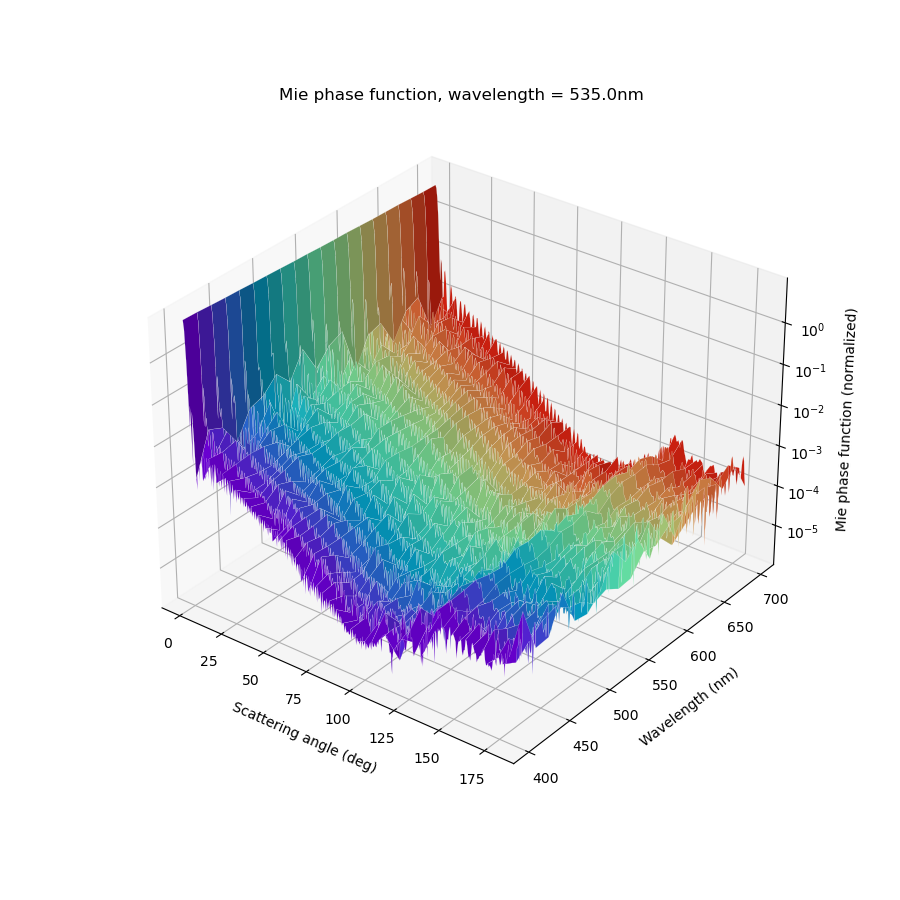

In [31]:
%matplotlib notebook
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(angles_deg, wavelengths)
colors = plt.cm.rainbow((Y - Y.min()) / float((Y - Y.min()).max()))

surf = ax.plot_surface(X, Y, np.log10(pf_data), facecolors=colors, linewidth=0.1)
surf.set_edgecolor('w')
ax.set_title('Wavelength (' + str(wstep) + ' nm bins) x Scattering angle (' 
                 + str(tstep) + ' deg bins) -> Mie phase function')
ax.set_xlabel('\n Scattering angle (deg)')
ax.set_ylabel('\n Wavelength (nm)')
ax.set_zlabel('\n Mie phase function (normalized)')

# Workaround for buggy log scale in 3d plot
zticks = [10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1]
ax.set_zticks(np.log10(zticks))
ax.set_zticklabels(['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$','$10^{1}$'])

# ax.view_init(elev = 0, azim = 0)
plt.show()

<IPython.core.display.Javascript object>


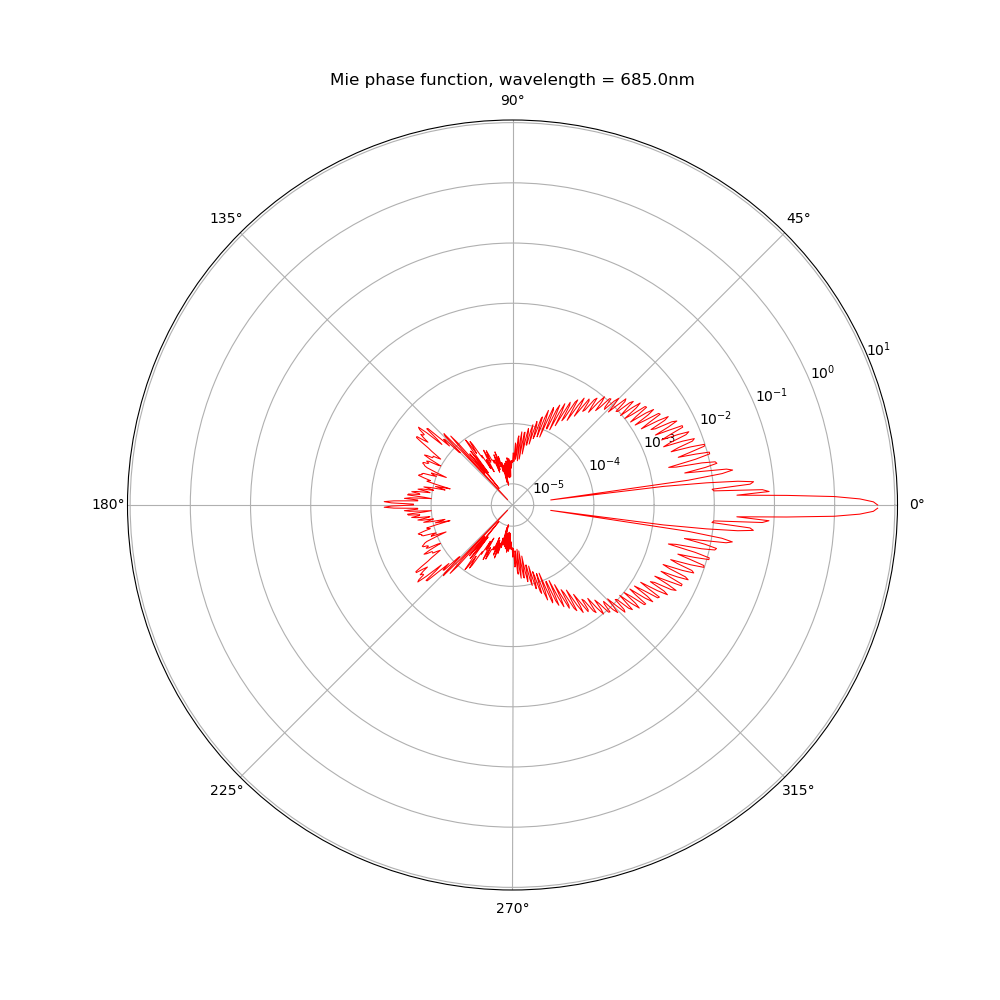

interactive(children=(FloatSlider(value=650.0, continuous_update=False, description='wavelength', layout=Layou…

In [32]:
%matplotlib notebook
from ipywidgets import *

angles_deg_360 = np.hstack((angles_deg[:-1], np.add(angles_deg[:-1], 180.)))
angles_rad_360 = np.deg2rad(angles_deg_360)

# Init to 650 nm
wbin = int((650. - wmin) / (wmax - wmin) * wbins)
pf_interact = pf_data[wbin][:-1]    
pf_360 = np.hstack((pf_interact, np.flip(pf_interact)))

# Plot pf in polar coordinates
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(polar=True))

p1, = ax.plot(angles_rad_360, np.log10(pf_360), color = colors[wbin][0], linewidth=0.75, label=str(w) + 'nm')
ax.set_title('Mie phase function, wavelength = ' + str(w) + 'nm')

# Workaround for buggy log scale in polar plots
rticks = [10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1]
ax.set_rticks(np.log10(zticks))
ax.set_yticklabels(['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$','$10^{1}$'])

@interact
def update(w = widgets.FloatSlider(min=wmin, max=wmax-1., step=wstep, value=650., 
           description='wavelength', layout=Layout(width='90%'), continuous_update=False)):
    
    wbin = int((w - wmin) / (wmax - wmin) * wbins)
    
    pf_interact = pf_data[wbin][:-1]
    pf_360 = np.hstack((pf_interact, np.flip(pf_interact)))

    p1.set_ydata(np.log10(pf_360))
    p1.set_label(str(w) + 'nm')

    p1.set_color(colors[wbin][0])
    ax.set_title('Mie phase function, wavelength = ' + str(w) + 'nm')

    fig.canvas.draw_idle()